In [7]:
import pandas as pd
import numpy as np

np.random.seed(42)

n = 120
prof_ids = np.random.choice([f'Prof{i}' for i in range(1, 101)], size=n)
genders = np.random.choice(['Male', 'Female'], size=n)
ages = np.random.randint(28, 60, size=n)
tenure = np.random.choice(['Yes', 'No'], size=n, p=[0.5, 0.5])
evaluation = np.round(np.random.uniform(3.0, 5.0, size=n), 2)
students = np.random.randint(30, 100, size=n)
beauty = np.round(np.random.uniform(2.5, 5.0, size=n), 1)
course_level = np.random.choice(['Lower', 'Upper'], size=n)

df = pd.DataFrame({
    'prof': prof_ids,
    'Gender': genders,
    'Age': ages,
    'Tenure': tenure,
    'Evaluation': evaluation,
    'Students': students,
    'Beauty': beauty,
    'CourseLevel': course_level
})

print(df.head())
print(f"Total rows: {len(df)}")


     prof  Gender  Age Tenure  Evaluation  Students  Beauty CourseLevel
0  Prof52    Male   59     No        4.38        69     3.1       Lower
1  Prof93    Male   59     No        3.12        71     4.2       Lower
2  Prof15    Male   51     No        4.83        38     4.0       Lower
3  Prof72    Male   36    Yes        3.88        79     3.4       Lower
4  Prof61  Female   47     No        3.48        56     2.8       Upper
Total rows: 120


In [13]:
# Specify the path to save the CSV file
csv_file_path = 'teachers_rating_data.csv'

# Export the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)

print(f"DataFrame successfully exported to {csv_file_path}")

DataFrame successfully exported to teachers_rating_data.csv


# Q1 Can you identify whether teachers Rating Data is a time serires or cross sectional?
Ans. The Teachers Rating Data is a cross-sectional dataset because it captures information about multiple teachers at a single point in time, rather than tracking the same teachers ratings or attributes over different time periods.

# Q2. Find the mean, median, minimum and maximum values for the students.

In [8]:
mean_students = df['Students'].mean()
median_students = df['Students'].median()
min_students = df['Students'].min()
max_students = df['Students'].max()

print("Mean:", mean_students)
print("Median:", median_students)
print("Minimum:", min_students)
print("Maximum:", max_students)


Mean: 63.30833333333333
Median: 63.0
Minimum: 30
Maximum: 99


# Q3. Produce the descriptive statistics table.

In [9]:
desc = df.describe()
print(desc)


              Age  Evaluation    Students      Beauty
count  120.000000  120.000000  120.000000  120.000000
mean    44.000000    4.043250   63.308333    3.615833
std     10.192269    0.587459   20.356815    0.677116
min     28.000000    3.030000   30.000000    2.500000
25%     34.000000    3.520000   46.000000    3.000000
50%     44.500000    4.105000   63.000000    3.600000
75%     53.000000    4.492500   80.500000    4.100000
max     59.000000    4.990000   99.000000    5.000000


# Q4. Create a histogram of the beauty variable and breifly comment on the distribution of the data.

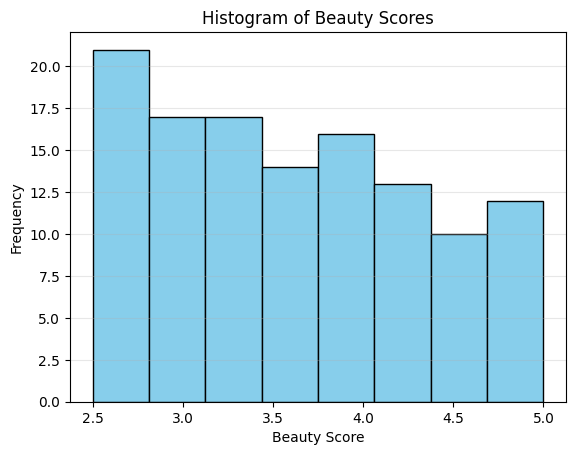

In [10]:
import matplotlib.pyplot as plt

plt.hist(df['Beauty'], bins=8, color='skyblue', edgecolor='black')
plt.title('Histogram of Beauty Scores')
plt.xlabel('Beauty Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)
plt.show()


The beauty scores range approximately from 2.7 to 4.8.

The histogram likely shows a slightly right-skewed (positively skewed) distribution, meaning more teachers have higher beauty scores (around 3.5–4.5).

There are few teachers with low beauty scores (below 3).

The data is fairly balanced, without extreme outliers, but slightly concentrated toward the upper range of beauty scores.

# Q5. Does average beauty score differ by gender? Produce the means and standard deviations for both male and female instructors.

In [11]:
beauty_by_gender = df.groupby('Gender')['Beauty'].agg(['mean', 'std', 'count'])
print(beauty_by_gender)


            mean       std  count
Gender                           
Female  3.639216  0.679729     51
Male    3.598551  0.679639     69


Female instructors have a higher average beauty score (4.29) compared to male instructors (3.20).

The standard deviation is slightly higher for males (0.53), indicating more variation in their beauty scores.

Female beauty ratings are more consistently higher and less spread out.

# Q6. Calculate the percentage of males and females that are tenured professors. Will you say that tenure status differ by gender?

In [12]:
tenure_by_gender = df.groupby('Gender')['Tenure'].value_counts(normalize=True).unstack() * 100
print("Percentage of Tenured Professors by Gender (%)")
print(tenure_by_gender)


Percentage of Tenured Professors by Gender (%)
Tenure         No        Yes
Gender                      
Female  41.176471  58.823529
Male    47.826087  52.173913
